# *Aufgabe: Baummethoden*

0. Imports

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from sklearn.datasets import load_diabetes
import numpy as np

### Aufgabe 1. Baummethoden

1. Import and Train/Test split

In [2]:
census = pd.read_csv("../../../data/census.csv")
census = census.drop(['occupation', 'relationship', 'capital-gain', 'capital-loss', 'native-country'], axis=1)

# Missing Values: 'workclass'

imp_most_frequent = SimpleImputer(missing_values=' ?', strategy='most_frequent')
census['workclass'] = imp_most_frequent.fit_transform(census['workclass'].to_numpy().reshape(-1,1))

# Encoding:
# SEX: Male: 1, Female: 0
census["sex"] = census["sex"].replace({' Male': 1, ' Female': 0})

# TARGET: >50K: 1, <=50K: 0 
census["target"] = census["target"].replace({' >50K': 1, ' <=50K': 0})

to_encode = ['workclass', 'education', 'marital-status', 'race']
for feature in to_encode:
    one_hot = pd.get_dummies(census[feature], drop_first=True)
    census = census.join(one_hot)
    census.pop(feature)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(census.drop(["target"],axis=1),census["target"])
print('X Train: {}'.format(x_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(x_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

# Normalize: Age und hours-per-week
minmax = MinMaxScaler()

x_train['age'] = minmax.fit_transform(x_train['age'].to_numpy().reshape(-1,1))
x_train['hours-per-week'] = minmax.fit_transform(x_train['hours-per-week'].to_numpy().reshape(-1,1))

x_test['age'] = minmax.fit_transform(x_test['age'].to_numpy().reshape(-1,1))
x_test['hours-per-week'] = minmax.fit_transform(x_test['hours-per-week'].to_numpy().reshape(-1,1))

X Train: (24420, 35)
Y Train: (24420,)
X Test: (8141, 35)
Y Test: (8141,)


2. Train the DT model for differnt max_depth's:

  0%|          | 0/20 [00:00<?, ?it/s]

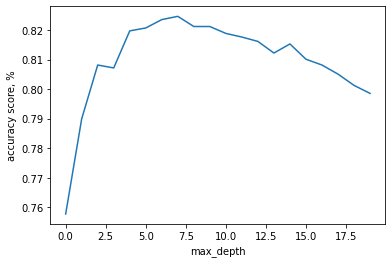

In [4]:
error = []

for i in trange(1, 21):
    clf = DecisionTreeClassifier(max_depth=i, min_samples_split=5, random_state=1)
    clf.fit(x_train, y_train)
    error.append(accuracy_score(clf.predict(x_test), y_test))
    
plt.plot(error)
plt.xlabel('max_depth')
plt.ylabel('accuracy score, %')
plt.show()

### Aufgabe 2. Visualisierung von Baummethoden Regressor

1. Import Data and visualize

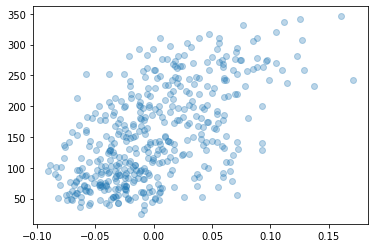

In [5]:
features, target = load_diabetes(return_X_y=True, as_frame=True)
bmi = features['bmi'].to_numpy().reshape(-1,1)
risk = target.to_numpy()
plt.scatter(bmi, risk, alpha=0.3)

2. Train and visualize the DT model for differnt max_depth's:

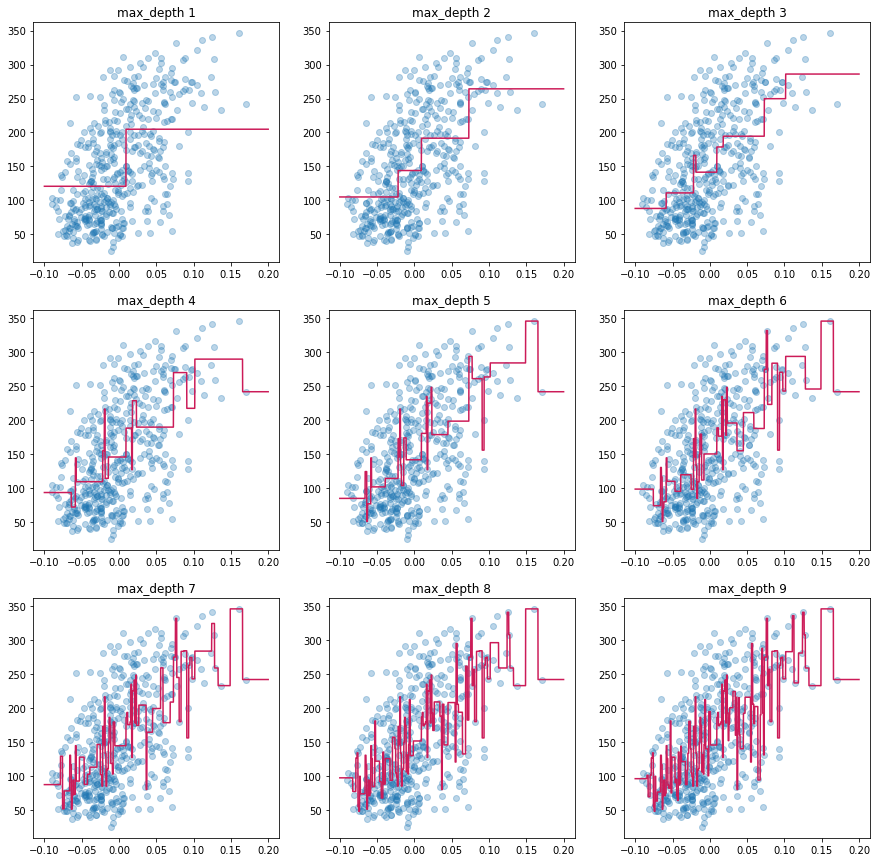

In [6]:
# Es gibt 1 Feature mit missing Values: 'workclass': 1836 Instanzen

fig = plt.figure(figsize=(15,15))
x_axis = np.linspace(-0.1, 0.2, 1500).reshape(-1,1)

for i in range(1, 10):
    
    # Plot the original data
    ax = fig.add_subplot(3, 3, i)
    ax.set_title("max_depth {}".format(i))
    ax.scatter(bmi, risk, alpha=0.3)
    
    # Train the model
    clf = DecisionTreeRegressor(max_depth=i, random_state=1)
    clf.fit(bmi, risk)

    # Predict the risk
    predicted = clf.predict(x_axis)
    
    # Visualise the model
                
    ax.plot(x_axis,predicted,c="#CC1B58")

plt.show()